In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as em
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [120]:
df=pd.read_csv('C:/Users/Sayan/Downloads/SoftDrink.csv')
df.head()

,YearMonth,SoftDrinkProduction
0,1980-01,1954
1,1980-02,2302
2,1980-03,3054
3,1980-04,2414
4,1980-05,2226


In [121]:
df.dtypes

YearMonth              object
SoftDrinkProduction     int64
dtype: object

In [122]:
df= pd.read_csv('C:/Users/Sayan/Downloads/SoftDrink.csv', parse_dates = ['YearMonth'],index_col='YearMonth')

In [123]:
df.dtypes

SoftDrinkProduction    int64
dtype: object

In [124]:
df.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


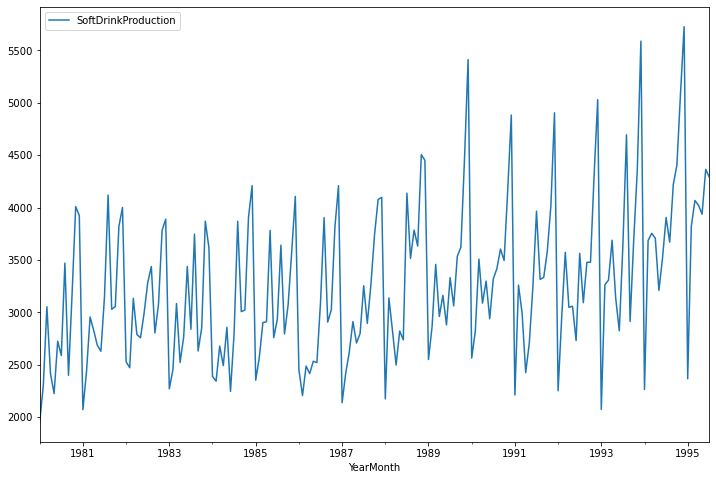

In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [231]:
df.describe()

,SoftDrinkProduction
count,187.000000
mean,3262.609626
std,728.357367
min,1954.000000
25%,2748.000000
50%,3134.000000
75%,3741.000000
max,5725.000000


In [233]:
df.isnull().sum()

SoftDrinkProduction    0
dtype: int64

In [237]:
df[df.duplicated()]

,SoftDrinkProduction
YearMonth,
1985-05-01,3782
1986-01-01,2452
1986-12-01,4209
1992-10-01,3478


In [126]:
df_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)

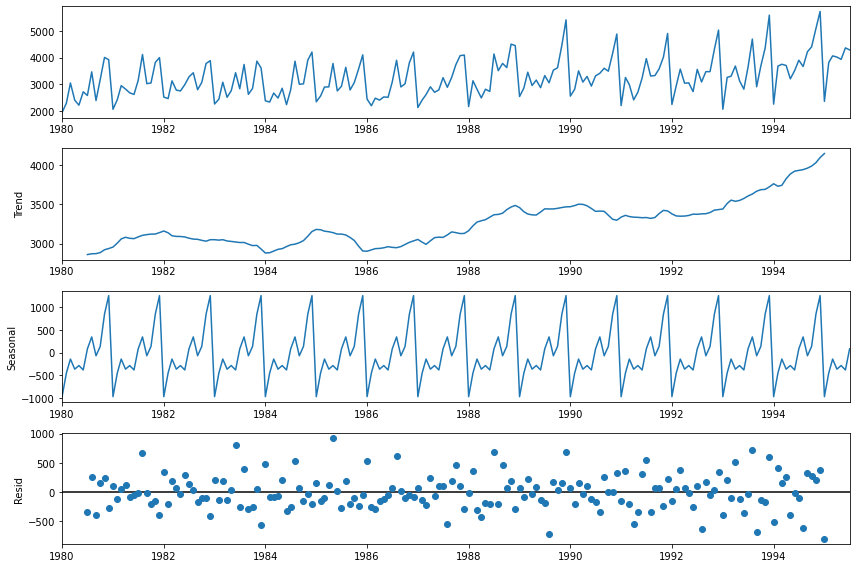

In [127]:
df_add_decompose.plot()
plt.show()

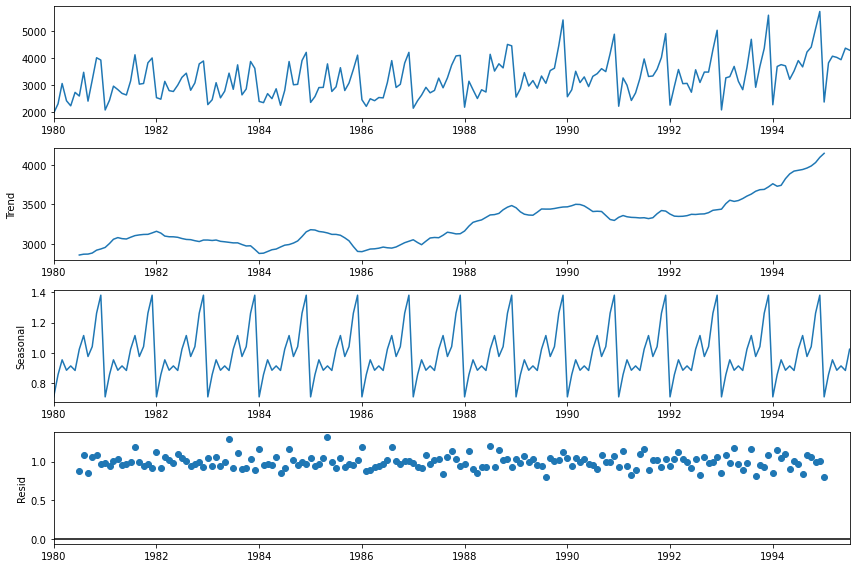

In [128]:
df_mul_decompose = seasonal_decompose(df, model = "multiplicative")
df_mul_decompose.plot()
plt.show()

In [129]:
train=df['1980-01-01':'1990-12-01']
test=df['1991-01-01':]

In [130]:
train.tail()

,SoftDrinkProduction
YearMonth,
1990-08-01,3418
1990-09-01,3604
1990-10-01,3495
1990-11-01,4163
1990-12-01,4882


In [131]:
test.head()

,SoftDrinkProduction
YearMonth,
1991-01-01,2211
1991-02-01,3260
1991-03-01,2992
1991-04-01,2425
1991-05-01,2707


In [132]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [239]:
55/187

0.29411764705882354

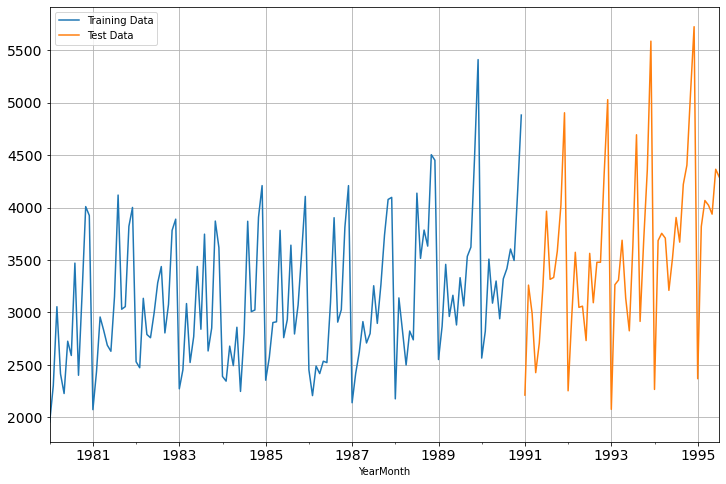

In [133]:
train['SoftDrinkProduction'].plot(fontsize=14)
test['SoftDrinkProduction'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [134]:
#Model 1:Linear Regression.

In [135]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [136]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [137]:
from IPython.display import display

In [138]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,SoftDrinkProduction,time
YearMonth,,
1980-01-01,1954,1
1980-02-01,2302,2
1980-03-01,3054,3
1980-04-01,2414,4
1980-05-01,2226,5


Last few rows of Training Data


,SoftDrinkProduction,time
YearMonth,,
1990-08-01,3418,128
1990-09-01,3604,129
1990-10-01,3495,130
1990-11-01,4163,131
1990-12-01,4882,132


First few rows of Test Data


,SoftDrinkProduction,time
YearMonth,,
1991-01-01,2211,133
1991-02-01,3260,134
1991-03-01,2992,135
1991-04-01,2425,136
1991-05-01,2707,137


Last few rows of Test Data


,SoftDrinkProduction,time
YearMonth,,
1995-03-01,4067,183
1995-04-01,4022,184
1995-05-01,3937,185
1995-06-01,4365,186
1995-07-01,4290,187


In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
lr = LinearRegression()

In [141]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'])

LinearRegression()

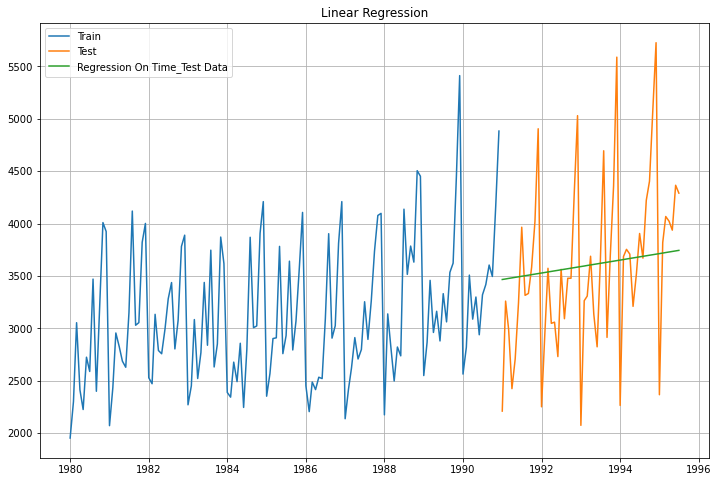

In [240]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title("Linear Regression")

plt.legend(loc='best')
plt.grid();

In [143]:
from sklearn import metrics

In [144]:
rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)

In [145]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,775.80781


In [146]:
#Model2:Naive Approach.

In [147]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [148]:
train.tail()

,SoftDrinkProduction
YearMonth,
1990-08-01,3418
1990-09-01,3604
1990-10-01,3495
1990-11-01,4163
1990-12-01,4882


In [149]:
NaiveModel_test['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

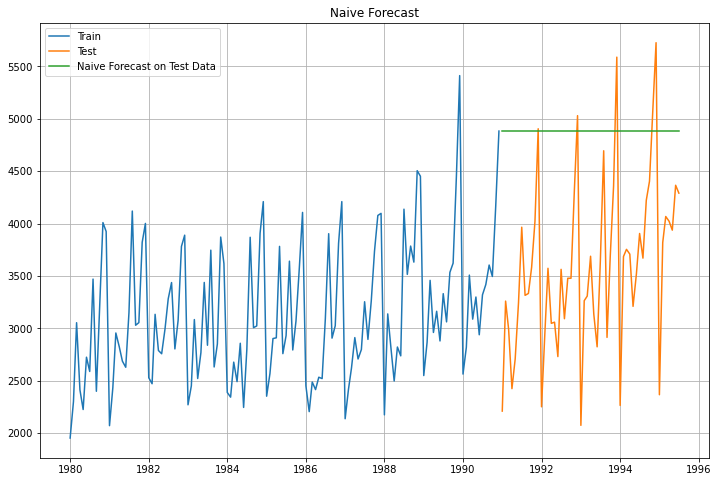

In [150]:
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [151]:
rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)

In [152]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233


In [153]:
#Model3:Simple Average.

In [154]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [155]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

,SoftDrinkProduction,mean_forecast
YearMonth,,
1991-01-01,2211,3124.166667
1991-02-01,3260,3124.166667
1991-03-01,2992,3124.166667
1991-04-01,2425,3124.166667
1991-05-01,2707,3124.166667


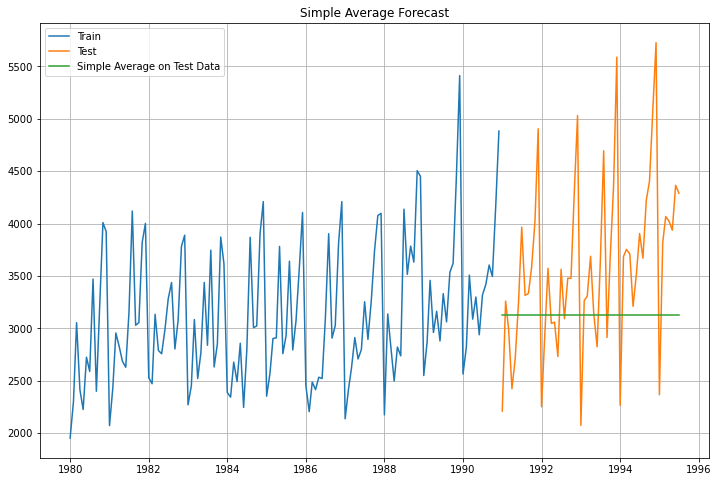

In [156]:
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [157]:
rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)

In [158]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358


In [159]:
#Model4:SES.

In [160]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [161]:
model_SES_autofit = model_SES.fit(optimized=True)

In [162]:
model_SES_autofit.params

{'smoothing_level': 0.10661860322756665,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2729.9483638405704,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [163]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    3629.174859
1991-02-01    3629.174859
1991-03-01    3629.174859
1991-04-01    3629.174859
1991-05-01    3629.174859
1991-06-01    3629.174859
1991-07-01    3629.174859
1991-08-01    3629.174859
1991-09-01    3629.174859
1991-10-01    3629.174859
1991-11-01    3629.174859
1991-12-01    3629.174859
1992-01-01    3629.174859
1992-02-01    3629.174859
1992-03-01    3629.174859
1992-04-01    3629.174859
1992-05-01    3629.174859
1992-06-01    3629.174859
1992-07-01    3629.174859
1992-08-01    3629.174859
1992-09-01    3629.174859
1992-10-01    3629.174859
1992-11-01    3629.174859
1992-12-01    3629.174859
1993-01-01    3629.174859
1993-02-01    3629.174859
1993-03-01    3629.174859
1993-04-01    3629.174859
1993-05-01    3629.174859
1993-06-01    3629.174859
1993-07-01    3629.174859
1993-08-01    3629.174859
1993-09-01    3629.174859
1993-10-01    3629.174859
1993-11-01    3629.174859
1993-12-01    3629.174859
1994-01-01    3629.174859
1994-02-01    3629.174859
1994-03-01  

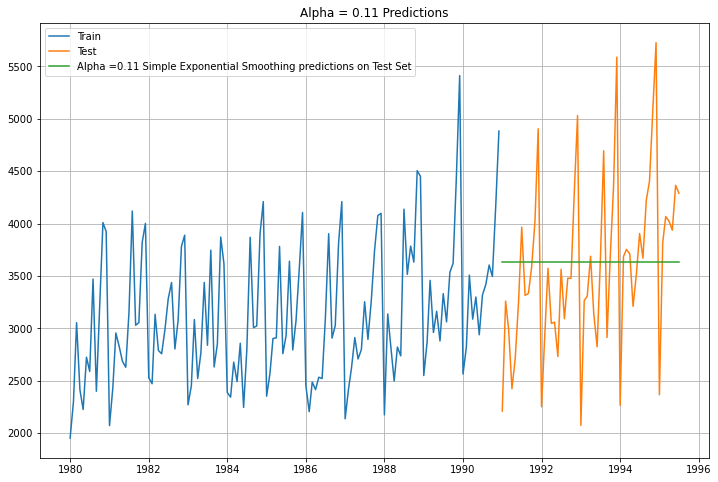

In [164]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.11 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.11 Predictions');

In [165]:
SES_RMSE=metrics.mean_squared_error(test.values,SES_predict.values,squared=False)

In [166]:
resultsDf_4= pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.11,SES'])

In [167]:
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
"Alpha=0.11,SES",807.854342


In [168]:
#Model5:DES.

In [169]:

model_DES = Holt(train,initialization_method='estimated')
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.12422870817741866, 'smoothing_trend': 0.10769078084465737, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 2142.92012945134, 'initial_trend': 42.27468405678113, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [170]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    3727.184409
1991-02-01    3751.450903
1991-03-01    3775.717397
1991-04-01    3799.983890
1991-05-01    3824.250384
1991-06-01    3848.516878
1991-07-01    3872.783372
1991-08-01    3897.049866
1991-09-01    3921.316359
1991-10-01    3945.582853
1991-11-01    3969.849347
1991-12-01    3994.115841
1992-01-01    4018.382335
1992-02-01    4042.648829
1992-03-01    4066.915322
1992-04-01    4091.181816
1992-05-01    4115.448310
1992-06-01    4139.714804
1992-07-01    4163.981298
1992-08-01    4188.247791
1992-09-01    4212.514285
1992-10-01    4236.780779
1992-11-01    4261.047273
1992-12-01    4285.313767
1993-01-01    4309.580260
1993-02-01    4333.846754
1993-03-01    4358.113248
1993-04-01    4382.379742
1993-05-01    4406.646236
1993-06-01    4430.912730
1993-07-01    4455.179223
1993-08-01    4479.445717
1993-09-01    4503.712211
1993-10-01    4527.978705
1993-11-01    4552.245199
1993-12-01    4576.511692
1994-01-01    4600.778186
1994-02-01    4625.044680
1994-03-01  

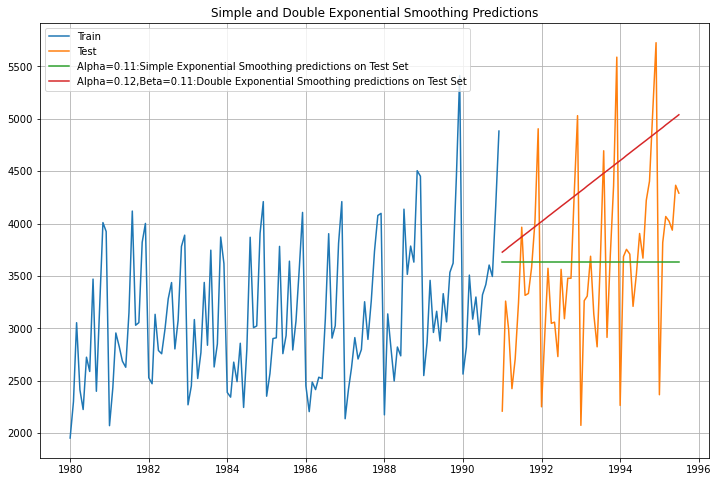

In [171]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.11:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.12,Beta=0.11:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [175]:
DES_RMSE=metrics.mean_squared_error(test.values,DES_predict.values,squared=False)

In [178]:
resultsDf_5= pd.DataFrame({'Test RMSE': [em.rmse(test.values,DES_predict.values)[0]]},index=['Alpha=0.12,Beta=0.11,DES'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
"Alpha=0.11,SES",807.854342
"Alpha=0.12,Beta=0.11,DES",817.898761


In [ ]:
#Model6:Holt-Winter's model.

In [179]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1330168756417712, 'smoothing_trend': 0.03278728597825541, 'smoothing_seasonal': 0.24047416373733949, 'damping_trend': nan, 'initial_level': 2815.8554371737428, 'initial_trend': 5.371067105883963, 'initial_seasons': array([-786.11122324, -579.54588953,  -14.26018655, -348.99664321,
       -323.6544389 , -216.22025598,  -39.60676489,  654.24723107,
       -221.68559848,   79.43214422,  865.61940461,  942.33851595]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [180]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    2596.451205
1991-02-01    2908.285987
1991-03-01    3304.865392
1991-04-01    3025.262291
1991-05-01    3226.193398
1991-06-01    3037.429629
1991-07-01    3558.689844
1991-08-01    3667.653214
1991-09-01    3613.474470
1991-10-01    3676.094837
1991-11-01    4396.678235
1991-12-01    4760.882780
1992-01-01    2658.632764
1992-02-01    2970.467546
1992-03-01    3367.046950
1992-04-01    3087.443850
1992-05-01    3288.374957
1992-06-01    3099.611188
1992-07-01    3620.871403
1992-08-01    3729.834773
1992-09-01    3675.656028
1992-10-01    3738.276396
1992-11-01    4458.859794
1992-12-01    4823.064339
1993-01-01    2720.814323
1993-02-01    3032.649105
1993-03-01    3429.228509
1993-04-01    3149.625409
1993-05-01    3350.556516
1993-06-01    3161.792747
1993-07-01    3683.052962
1993-08-01    3792.016332
1993-09-01    3737.837587
1993-10-01    3800.457954
1993-11-01    4521.041353
1993-12-01    4885.245897
1994-01-01    2782.995881
1994-02-01    3094.830664
1994-03-01  

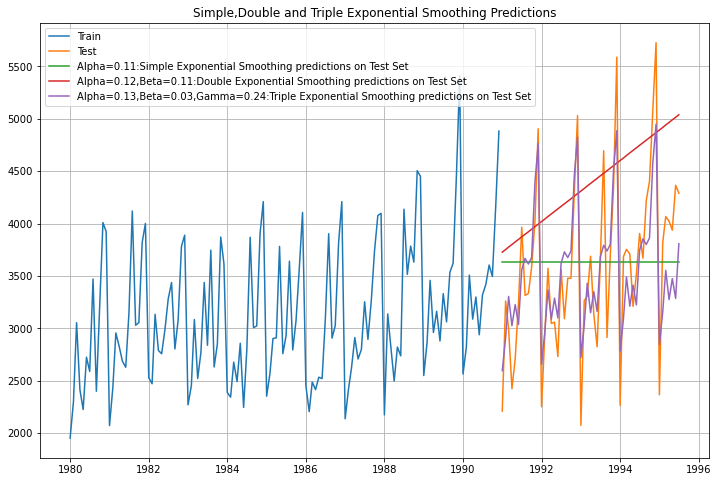

In [181]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.11:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.12,Beta=0.11:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.13,Beta=0.03,Gamma=0.24:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [183]:
TES_RMSE=metrics.mean_squared_error(test.values,TES_predict.values,squared=False)

In [186]:
resultsDf_6 = pd.DataFrame({'Test RMSE':[em.rmse(test.values,TES_predict.values)[0]]},index=['Alpha=0.13,Beta=0.03,Gamma=0.24,TES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
"Alpha=0.11,SES",807.854342
"Alpha=0.12,Beta=0.11,DES",817.898761
"Alpha=0.13,Beta=0.03,Gamma=0.24,TES",1283.860405


In [187]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')

model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11156111705719399, 'smoothing_trend': 0.04961674644737678, 'smoothing_seasonal': 0.23021075964956436, 'damping_trend': nan, 'initial_level': 2802.5861650146553, 'initial_trend': 12.592939713567903, 'initial_seasons': array([0.78867454, 0.84914199, 1.03179731, 0.92079004, 0.94437325,
       0.96715922, 1.03181978, 1.24371803, 0.98671667, 1.06774225,
       1.35021348, 1.3746236 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [189]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    2566.192540
1991-02-01    2888.875656
1991-03-01    3296.836159
1991-04-01    3007.826478
1991-05-01    3214.380975
1991-06-01    3020.865425
1991-07-01    3572.776016
1991-08-01    3714.246056
1991-09-01    3597.613070
1991-10-01    3679.837183
1991-11-01    4461.068583
1991-12-01    4866.522618
1992-01-01    2606.883205
1992-02-01    2934.622476
1992-03-01    3348.974440
1992-04-01    3055.331567
1992-05-01    3265.081621
1992-06-01    3068.451189
1992-07-01    3628.981894
1992-08-01    3772.600998
1992-09-01    3654.061672
1992-10-01    3737.500531
1992-11-01    4530.882724
1992-12-01    4942.582778
1993-01-01    2647.573870
1993-02-01    2980.369297
1993-03-01    3401.112720
1993-04-01    3102.836657
1993-05-01    3315.782267
1993-06-01    3116.036954
1993-07-01    3685.187772
1993-08-01    3830.955940
1993-09-01    3710.510274
1993-10-01    3795.163879
1993-11-01    4600.696865
1993-12-01    5018.642938
1994-01-01    2688.264536
1994-02-01    3026.116117
1994-03-01  

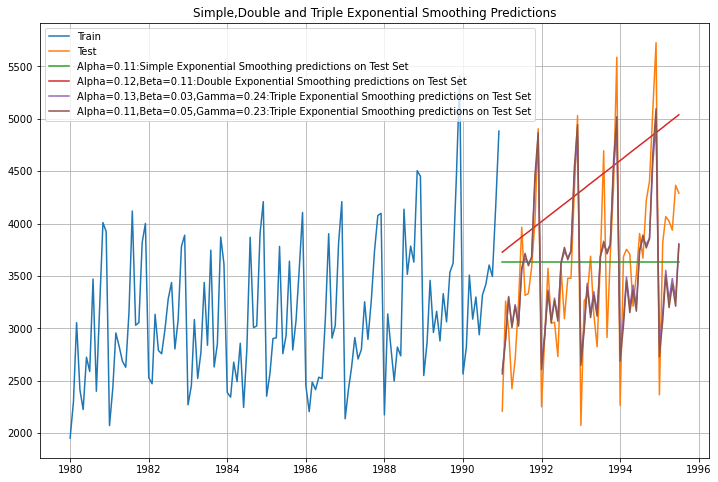

In [190]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.11:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.12,Beta=0.11:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.13,Beta=0.03,Gamma=0.24:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.11,Beta=0.05,Gamma=0.23:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [192]:
TES_am_RMSE=metrics.mean_squared_error(test.values,TES_predict_am.values,squared=False)

In [193]:
resultsDf_7= pd.DataFrame({'Test RMSE': [em.rmse(test.values,TES_predict_am.values)[0]]},index=['Alpha=0.11,Beta=0.05,Gamma=0.23,TES'])
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
"Alpha=0.11,SES",807.854342
"Alpha=0.12,Beta=0.11,DES",817.898761
"Alpha=0.13,Beta=0.03,Gamma=0.24,TES",1283.860405
"Alpha=0.11,Beta=0.05,Gamma=0.23,TES",1307.530087


In [194]:
#Stationarity.

In [196]:
from statsmodels.tsa.stattools import adfuller

In [197]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -0.425
DF test p-value is 0.9861019765758295
Number of lags used 12


In [198]:
#p-value>0.05

In [199]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -9.481
DF test p-value is 3.05370929253607e-14
Number of lags used 11


Text(0.5, 1.0, 'Stationary Time Series')

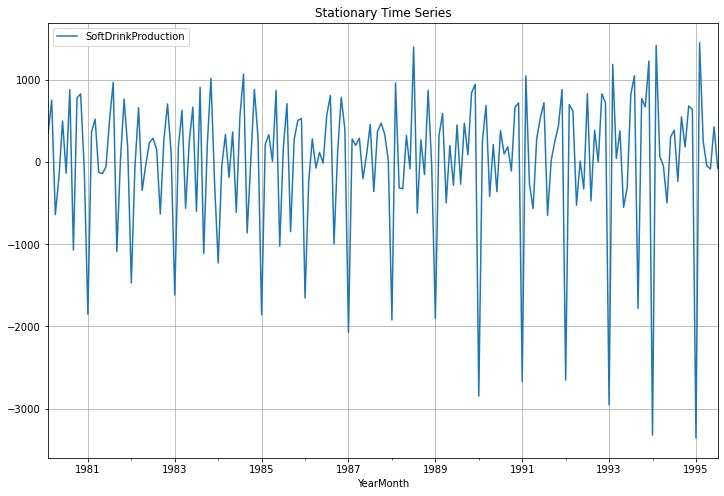

In [241]:
df.diff().dropna().plot(grid=True);
plt.title('Stationary Time Series')

In [201]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

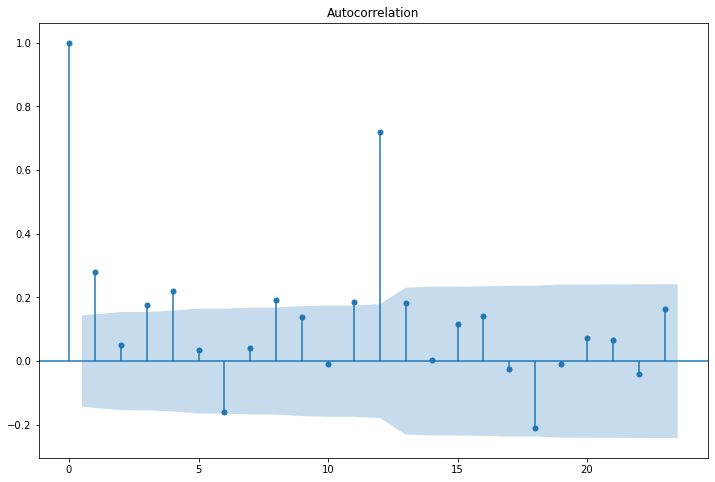

In [202]:
plot_acf(df,alpha=0.05);

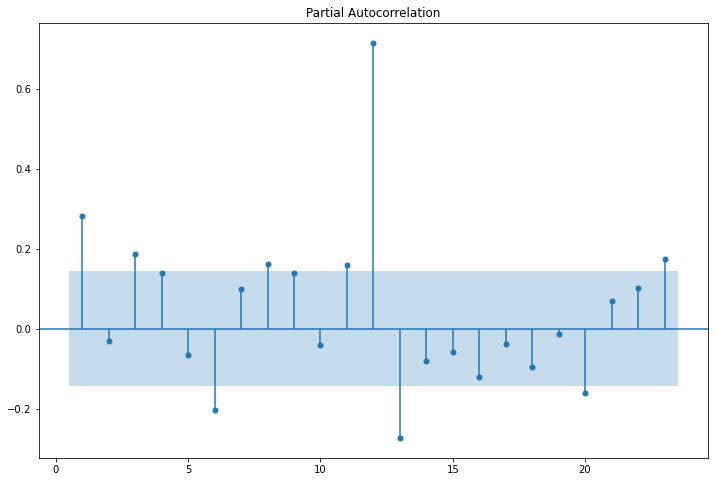

In [203]:
plot_pacf(df,zero=False,alpha=0.05);

In [204]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [205]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [206]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['SoftDrinkProduction'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.599630211588
ARIMA(0, 1, 2) - AIC:2056.4892632434785
ARIMA(0, 1, 3) - AIC:2056.8317894194997
ARIMA(1, 1, 0) - AIC:2097.872121649042
ARIMA(1, 1, 1) - AIC:2061.5230839331443
ARIMA(1, 1, 2) - AIC:2056.7156820689042
ARIMA(1, 1, 3) - AIC:2058.712159036516
ARIMA(2, 1, 0) - AIC:2073.234860536023
ARIMA(2, 1, 1) - AIC:2059.100671813563
ARIMA(2, 1, 2) - AIC:2058.71270210031


C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2057.0897189504094
ARIMA(3, 1, 0) - AIC:2070.3653671411794
ARIMA(3, 1, 1) - AIC:2058.3045469465414
ARIMA(3, 1, 2) - AIC:2060.679965709427
ARIMA(3, 1, 3) - AIC:2059.605474282597


C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [207]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
2,"(0, 1, 2)",2056.489263
6,"(1, 1, 2)",2056.715682
3,"(0, 1, 3)",2056.831789
11,"(2, 1, 3)",2057.089719
13,"(3, 1, 1)",2058.304547


In [208]:
auto_ARIMA = ARIMA(train, order=(0,1,2))
results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(0, 1, 2)   Log Likelihood               -1025.245
Date:                 Tue, 01 Nov 2022   AIC                           2056.489
Time:                         17:05:39   BIC                           2065.115
Sample:                     01-01-1980   HQIC                          2059.994
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5407      0.085     -6.392      0.000      -0.707      -0.375
ma.L2         -0.3913      0.113     -3.475      0.001      -0.612      -0.171
sigma2      3.572e+05   4.62e+04      7.725 

In [211]:
from sklearn.metrics import mean_squared_error

In [209]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [212]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_ARIMA,squared=False)

In [221]:
EV=resultsDf.drop('RMSE',axis=1)
EV=resultsDf.drop(index='ARIMA(0,1,2)')

In [222]:
resultsDf_8=pd.DataFrame({'Test RMSE': rmse},index=['ARIMA(0,1,2)'])

EV=pd.concat([EV,resultsDf_8])
EV

,Test RMSE,RMSE
RegressionOnTime,775.807810,NaN
NaiveModel,1519.259233,NaN
SimpleAverageModel,934.353358,NaN
"Alpha=0.11,SES",807.854342,NaN
"Alpha=0.12,Beta=0.11,DES",817.898761,NaN
"Alpha=0.13,Beta=0.03,Gamma=0.24,TES",1283.860405,NaN
"Alpha=0.11,Beta=0.05,Gamma=0.23,TES",1307.530087,NaN
"ARIMA(0,1,2)",831.615850,NaN


In [223]:
EV=EV.drop('RMSE',axis=1)
EV

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
"Alpha=0.11,SES",807.854342
"Alpha=0.12,Beta=0.11,DES",817.898761
"Alpha=0.13,Beta=0.03,Gamma=0.24,TES",1283.860405
"Alpha=0.11,Beta=0.05,Gamma=0.23,TES",1307.530087
"ARIMA(0,1,2)",831.615850


In [225]:
manual_ARIMA = ARIMA(train['SoftDrinkProduction'], order=(1,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(1, 1, 2)   Log Likelihood               -1024.358
Date:                 Tue, 01 Nov 2022   AIC                           2056.716
Time:                         17:24:53   BIC                           2068.216
Sample:                     01-01-1980   HQIC                          2061.389
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2919      0.256     -1.141      0.254      -0.793       0.210
ma.L1         -0.2916      0.205     -1.425      0.154      -0.693       0.109
ma.L2         -0.6165      0.147     -4.191 

In [226]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [227]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_ARIMA,squared=False)

In [229]:
resultsDf_9 = pd.DataFrame({'Test RMSE': rmse},index=['ARIMA(1,1,2)'])


EV= pd.concat([EV,resultsDf_9])

EV

,Test RMSE
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
"Alpha=0.11,SES",807.854342
"Alpha=0.12,Beta=0.11,DES",817.898761
"Alpha=0.13,Beta=0.03,Gamma=0.24,TES",1283.860405
"Alpha=0.11,Beta=0.05,Gamma=0.23,TES",1307.530087
"ARIMA(0,1,2)",831.615850
"ARIMA(1,1,2)",823.300374


In [263]:
Future_time=[i+188 for i in range(12)]
PD=pd.DataFrame(Future_time)
PD.columns=['Time']

In [264]:
PD['Regression on time']=lr.predict(PD)

In [265]:
PD

,Time,Regression on time
0,188,3749.110028
1,189,3754.253595
2,190,3759.397161
3,191,3764.540728
4,192,3769.684295
5,193,3774.827862
6,194,3779.971428
7,195,3785.114995
8,196,3790.258562
9,197,3795.402129


In [270]:
PD['Yearmonth']=['1995-08-01','1995-09-01','1995-10-01','1995-11-01','1995-12-01','1996-01-01','1996-02-01','1996-03-01','1996-04-01','1996-05-01','1996-06-01','1996-07-01']

In [268]:
df.tail()

,SoftDrinkProduction
YearMonth,
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937
1995-06-01,4365
1995-07-01,4290


In [272]:
PD['Yearmonth']=pd.to_datetime(PD['Yearmonth'])

In [275]:
PD.set_index('Yearmonth',inplace=True)

In [276]:
PD

,Time,Regression on time
Yearmonth,,
1995-08-01,188,3749.110028
1995-09-01,189,3754.253595
1995-10-01,190,3759.397161
1995-11-01,191,3764.540728
1995-12-01,192,3769.684295
1996-01-01,193,3774.827862
1996-02-01,194,3779.971428
1996-03-01,195,3785.114995
1996-04-01,196,3790.258562


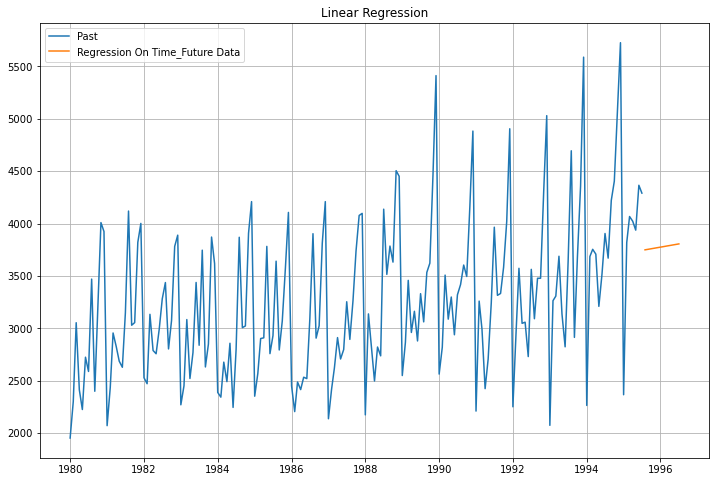

In [278]:
plt.plot( df['SoftDrinkProduction'], label='Past')
#plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(PD['Regression on time'], label='Regression On Time_Future Data')
plt.title("Linear Regression")

plt.legend(loc='best')
plt.grid();